# [LAB 09] 기초 통계량


## 전체 프로세스

| 노트북 | 제목             | 주요 내용                         | 학습 포인트             |
|--------|------------------|-----------------------------------|--------------------------|
| 01     | 기초통계량 확인 | 중심경향성, 산포도, 결측값 분석   | 데이터의 기본 특성 파악 |
| 02     | 상관관계 분석   | 상관계수, 다중공선성(VIF)         | 변수 간 연관성 분석     |
| 03     | 시계열 패턴 분석 | 추세, 계절성, 이동평균, 변화율     | 시간에 따른 변화 패턴   |

1~3단계가 진행되는 동안 데이터의 분포 형태를 관찰하고, 데이터 구조 이해를 이해한다.  
그리고 그 결과를 시각적으로 요약하여 보고한다.



## 1.기초 통계량 확인 프로세스

1. 데이터 기본 정보 파악
   - 데이터 크기(행/열) 확인
   - 데이터 타입 타입 확인
   - 변수 유형 분류 및 타입 변환 (수치형/범주형)
   - 결측치 현황 파악

2. 수치형 변수 통계량
   - 기술통계 확인
   - 중심경향성 해석
   - 산포도 해석

3. 범주형 변수 통계량
   - 빈도 및 최빈값 확인

4. 보고서 작성
   - 데이터 품질 종합 평가에 대한 결과 보고



### #01.준비작업

#### 1.라이브러리 가져오기

In [1]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

from hossam import load_data

#### 2.시각화 초기

In [4]:
#한글을 지원하는 폰트 파일의 경로
font_path ='C:\\Data_Analysis_Basic\\[LAB-06] 데이터 시각화 개요\\NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### 3.데이터 가져오기

In [6]:
origin = load_data('countries_aggregated')
origin.head()

[data] https://data.hossam.kr/data/lab09/countries_aggregated.xlsx
[desc] 전 세계 각국(country) 단위로 매일 집계된 COVID-19 감염 상황 (출처: Johns Hopkins University Center for Systems Science and Engineering)

field      description
---------  ----------------------------------------
Date       날짜
Country    국가명
Confirmed  해당 날짜를 기준으로 하는 누적 확진자 수
Recovered  해당 날짜를 기준으로 하는 누적 완치자 수
Deaths     해당 날짜를 기준으로 하는 누적 사망자 수



,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [7]:
origin.tail()

,Date,Country,Confirmed,Recovered,Deaths
161563,2022-04-12,Zimbabwe,247094,0,5460
161564,2022-04-13,Zimbabwe,247160,0,5460
161565,2022-04-14,Zimbabwe,247208,0,5462
161566,2022-04-15,Zimbabwe,247237,0,5462
161567,2022-04-16,Zimbabwe,247237,0,5462


### #02.데이터 기본 정보 파악

#### 2-1 데이터 크기 (행/열) 확인

In [8]:
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")

데이터셋 크기: (161568, 5)
열 개수: 5
행 개수: 161568


#### 2-2 데이터 크기 타입 확인

In [9]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB


#### 2-3 변수 유형 분류 및 타입 변환(수치형/범주형)

In [10]:
df = origin.astype({'Country' : 'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  category      
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(3)
memory usage: 5.2 MB


#### 2-4 결측치 현황 파악

In [11]:
df.isna().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

### #03.수치형 변수 통계량

#### 3-1 기술 통계 확인
모든 데이터에 대해서 극심한 우편향 분포를 보인다.

- Confirmed (확진자수): 평균(736, 157명) > 중위수(23, 692명)
- Recovered (완치자수): 평균(145, 397명) > 중위수(126명)
- Deaths (사망자수): 평균(13, 999명) > 중위수(365명)

In [12]:
df[['Confirmed','Recovered','Deaths']].describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,161568.0,736156.934009,3.578884e+06,0.0,1220.0,23692.0,255842.00,80625120.0
Recovered,161568.0,145396.711892,9.748275e+05,0.0,0.0,126.0,17972.25,30974748.0
Deaths,161568.0,13999.436089,5.911358e+04,0.0,17.0,365.0,4509.00,988609.0


#### 3-2 중심 경향성 및 산포도 해석
1) 상자 그림을 통한 데이터 분포 확인
2) 로그값을 통한 데이터 분포 재확인

3-2-1) 상자 그림을 통한 데이터 분포 확인
(이상치의 영향을 너무 많이 받고 있는 것으로 확인된다)

- 모든 변수에서 다수의 이상값 존재
- 모든 데이터가 우편향이 심하기 때문에 이상치가 많음을 의미
- 이 상태로는 데이터의 분포를 확인하기 어렵다. -> 스케일링이 필요함을 시사
- 데이터간의 격차가 클 경우 데이터 스케일링을 수행해야 한다. 
- EDA과정에서는 log값을 취하는 것도 스케일링의 한 방법

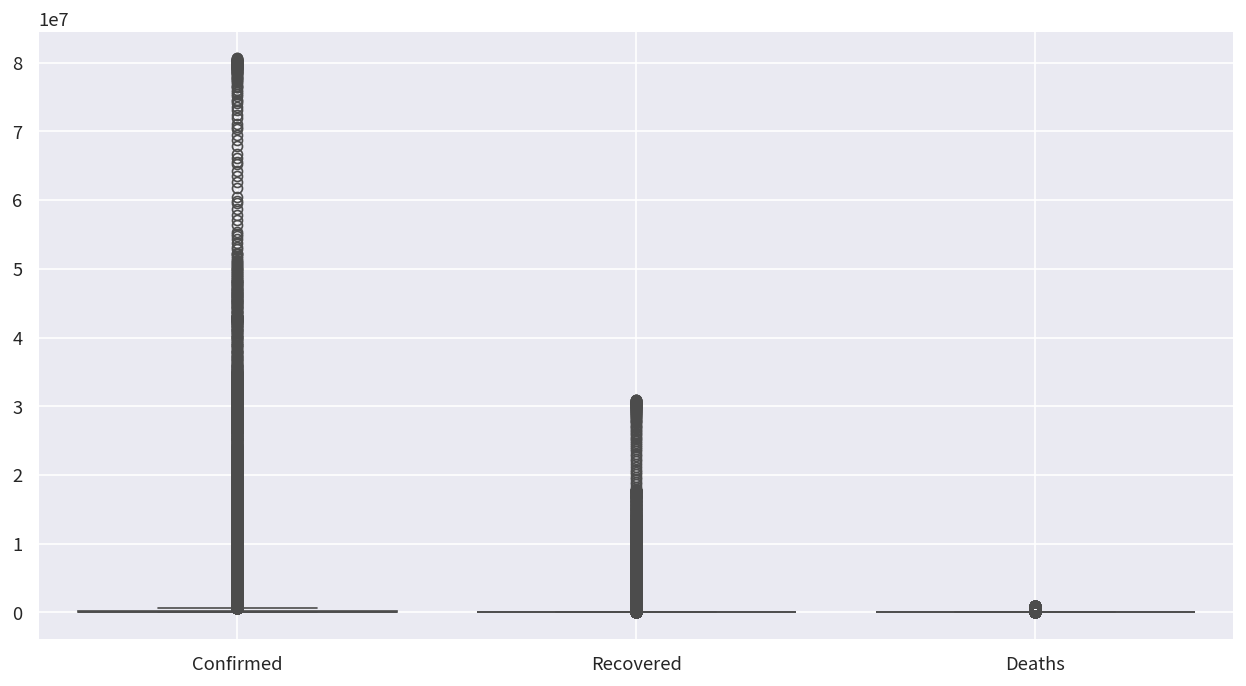

In [14]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) barplot 그리기
sb.boxplot(
    data=df,orient = 'v'
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


3-2-2) 로그값을 통한 데이터 분포 재확인
- 시각화 결과를 통해 Confirmed, Recovered 에서 명확한 우편향 분포 확인
- 로그 변환 후에도 여전히 치우친 분포 : 정규분포와 거리가 멀다

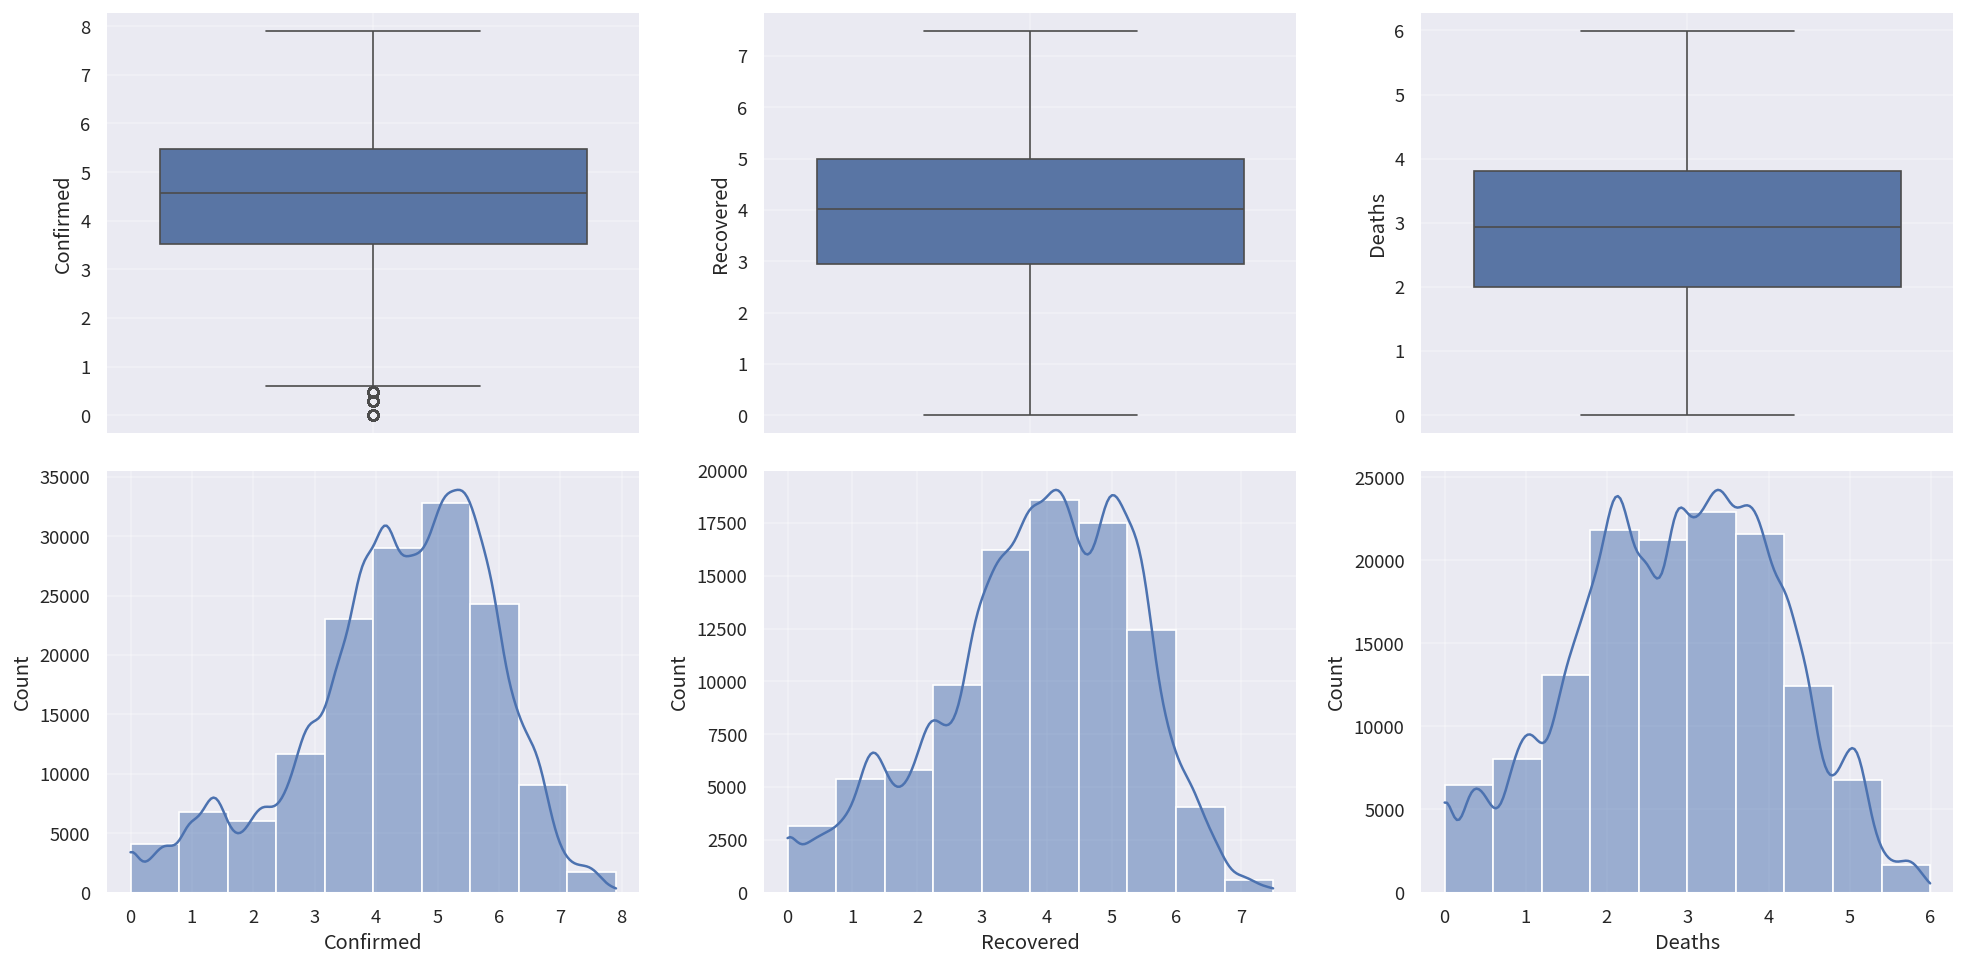

In [15]:
# 1) 그래프 초기화
width_px  = 2000          # 그래프 가로 크기
height_px = 1000          # 그래프 세로 크기
rows = 2                  # 그래프 행 수
cols = 3                  # 그래프 열 수

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for i, col in enumerate(['Confirmed', 'Recovered', 'Deaths']):
    
    data = df[df[col] > 0][col]
    log_data = np.log10(data)

    # 2) Boxplot 그리기
    sb.boxplot(log_data, orient='v', ax=ax[0][i])
    ax[0][i].grid(True, alpha=0.3)

    # 3) Histogram 그리기
    sb.histplot(log_data, bins=10, kde=True, ax=ax[1][i])
    ax[1][i].grid(True, alpha=0.3)

# 4) 출력
plt.tight_layout()          # 여백 제거
plt.show()                  # 그래프 화면 출력
plt.close()                 # 그래프 작업 종료


### #04.범주형 변수 통계량
#### 4-1 빈도 및 최빈값 확인

In [16]:
df.describe(include='category')

,Country
count,161568
unique,198
top,Afghanistan
freq,816


#### 4-1 빈도 및 최빈값 확인

### #05.데이터 품질 종합 평가에 대한 결과 보고


#### 데이터 품질 및 분포 분석 요약

 • 데이터 완성도 (Completeness)
- 결측값 **0개** → 완벽한 데이터 완성도 달성
- **198개국 × 816일 = 161,568개** 전체 레코드 누락 없음
- 시계열 데이터의 연속성 보장 → **추세 분석 가능**

---

 • 데이터 일관성 (Consistency)
- 모든 수치형 변수: **정수형(int64)** 으로 일관된 타입 유지
- 날짜 변수: **datetime64** 표준 형식으로 일관성 유지

---

• 데이터 분포 특성 (Distribution Characteristics)
- **극심한 우편향 분포**: 일부 국가에 극값 집중
- **높은 변동성**: 표준편차가 평균의 **4~6배**
- **국가 간 격차 큼**: 최댓값과 중위수 간 **수천~수만 배 차이**

---

0 • 분석 시 고려사항 (Considerations for Analysis)
- 국가 간 편차가 매우 크므로, **구간별 분리 분석** 필요
- 이상치(outlier) 처리 필수
- 실제 데이터 기반이므로 이상치를 임의로 수정하기보다  
  **스케일링(정규화, 로그 변환 등)** 적용하는 방식이 바람직함
